In [1]:
#!/usr/bin/python
# -*- encoding: utf-8 -*-

# from logger import setup_logger
from model import BiSeNet

import torch

import os
import os.path as osp
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
import cv2
import matplotlib.pyplot as plt



In [2]:

def vis_parsing_maps(im, parsing_anno, stride, save_im=False, save_path='vis_results/parsing_map_on_im.jpg'):
    # Colors for all 20 parts
    part_colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0],
                   [255, 0, 85], [255, 0, 170],
                   [0, 255, 0], [85, 255, 0], [170, 255, 0],
                   [0, 255, 85], [0, 255, 170],
                   [0, 0, 255], [85, 0, 255], [170, 0, 255],
                   [0, 85, 255], [0, 170, 255],
                   [255, 255, 0], [255, 255, 85], [255, 255, 170],
                   [255, 0, 255], [255, 85, 255], [255, 170, 255],
                   [0, 255, 255], [85, 255, 255], [170, 255, 255]]

    im = np.array(im)
    vis_im = im.copy().astype(np.uint8)
    vis_parsing_anno = parsing_anno.copy().astype(np.uint8)
    vis_parsing_anno = cv2.resize(vis_parsing_anno, None, fx=stride, fy=stride, interpolation=cv2.INTER_NEAREST)
    vis_parsing_anno_color = np.zeros((vis_parsing_anno.shape[0], vis_parsing_anno.shape[1], 3)) + 255

    num_of_class = np.max(vis_parsing_anno)

    for pi in range(1, num_of_class + 1):
        index = np.where(vis_parsing_anno == pi)
        vis_parsing_anno_color[index[0], index[1], :] = part_colors[pi]

    vis_parsing_anno_color = vis_parsing_anno_color.astype(np.uint8)
    # print(vis_parsing_anno_color.shape, vis_im.shape)
    vis_im = cv2.addWeighted(cv2.cvtColor(vis_im, cv2.COLOR_RGB2BGR), 0.4, vis_parsing_anno_color, 0.6, 0)

    # Save result or not
    if save_im:
        cv2.imwrite(save_path[:-4] +'.png', vis_parsing_anno)
        cv2.imwrite(save_path, vis_im, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

    # return vis_im

    

In [3]:
dspth='/home/ishan/face-parsing.PyTorch/test-img'
cp='79999_iter.pth'
respth='./res/test_res'

if not os.path.exists(respth):
        os.makedirs(respth)

n_classes = 19
net = BiSeNet(n_classes=n_classes)
net.cuda()
save_pth = osp.join('res/cp', cp)
net.load_state_dict(torch.load(save_pth))
net.eval()

to_tensor = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])
with torch.no_grad():
    for image_path in os.listdir(dspth):
        if image_path.endswith('.png') or image_path.endswith('.jpg') :
            img = Image.open(osp.join(dspth, image_path))
            image = img.resize((512, 512), Image.BILINEAR)
            img = to_tensor(image)
            img = torch.unsqueeze(img, 0)
            img = img.cuda()
            out = net(img)[0]
            parsing = out.squeeze(0).cpu().numpy().argmax(0)
            # print(parsing)
            print(np.unique(parsing))

            vis_parsing_maps(image, parsing, stride=1, save_im=True, save_path=osp.join(respth, image_path))

/tmp/ipykernel_822971/3067278077.py:23: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  image = img.resize((512, 512), Image.BILINEAR)


[ 0  1  2  3  4  5  7  8  9 10 12 13 14 17]
[ 0  1  2  3  4  5  7  8 10 12 13 14 16 17]
[ 0  1  2  3  4  5  7  8 10 12 13 14 16 17]
[ 0  1  2  3  4  5  7 10 12 13 14 16 17]
[ 0  1  2  3  6  8 10 12 13 14 17]
[ 0  1  2  3  4  5  8 10 11 12 13 14 16 17]
[ 0  1  2  3  4  5  7  8 10 12 13 14 16 17]
[ 0  1  2  3  4  5  7  8  9 10 12 13 14 16 17]


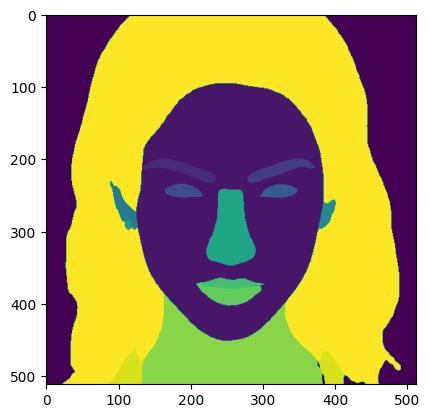

In [4]:
plt.imshow(parsing, cmap='viridis')
plt.show()

In [5]:
preprocessed_mask_np = cv2.imread('/home/ishan/Bisenetv1/res/test_res/24082023/9.png', cv2.IMREAD_GRAYSCALE)
preprocessed_mask = Image.open('/home/ishan/face-parsing.PyTorch/res/preprocessed_files/51.png')

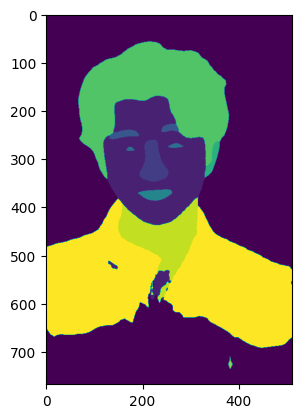

In [6]:
plt.imshow(preprocessed_mask_np)

In [7]:
np.unique(preprocessed_mask_np)

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 10, 11], dtype=uint8)

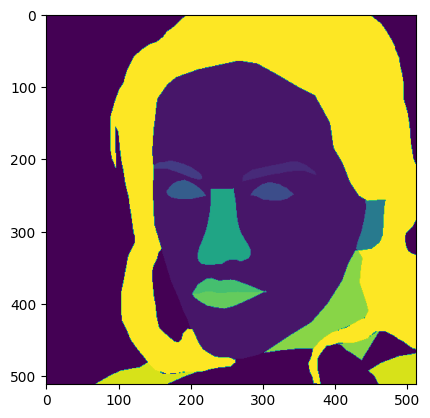

In [8]:
# Convert the image to a numpy array
image_array = np.array(preprocessed_mask.convert('P'))

# Plot the image using matplotlib
plt.imshow(image_array)
plt.show()

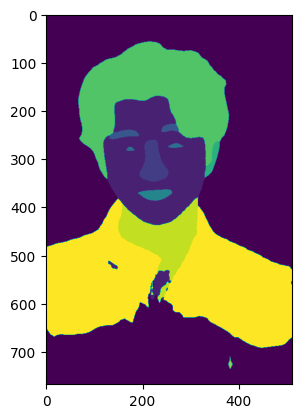

0


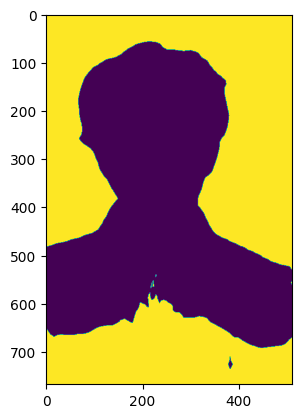

1


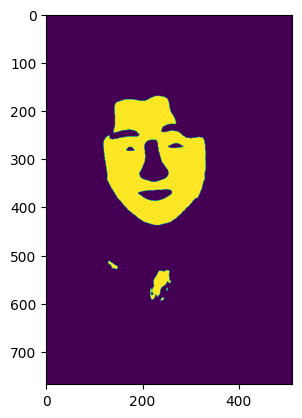

2


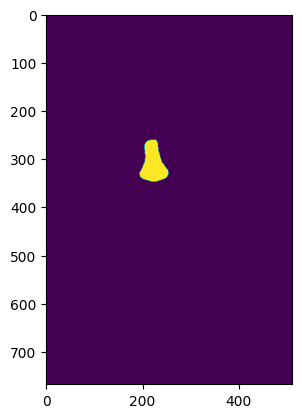

3


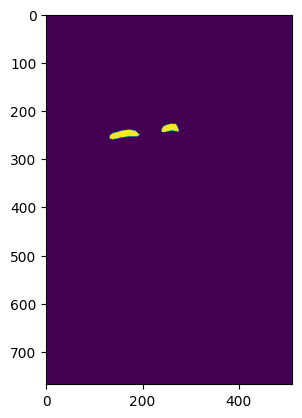

4


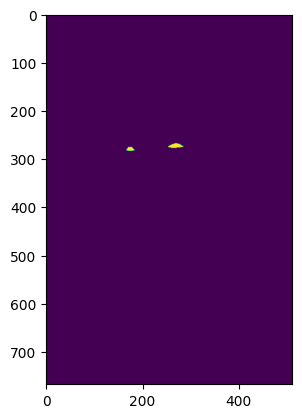

5


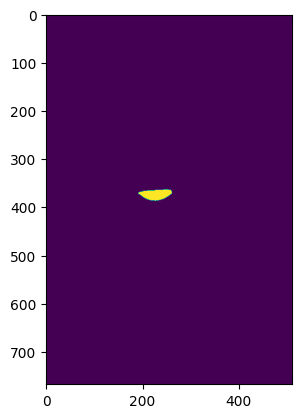

7


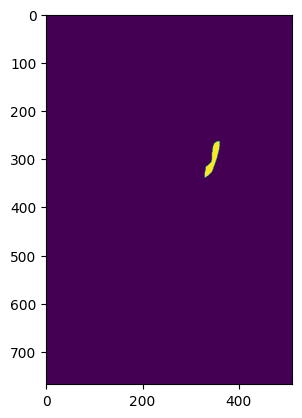

8


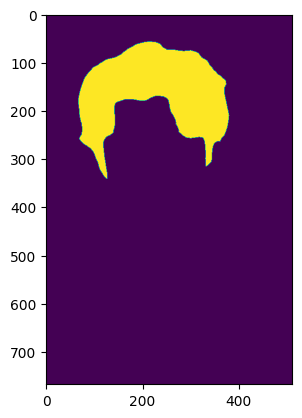

9


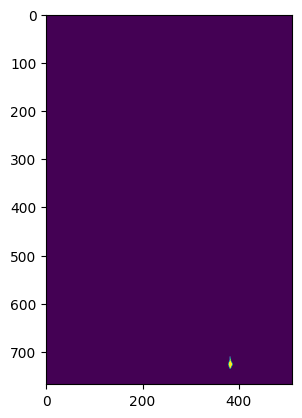

10


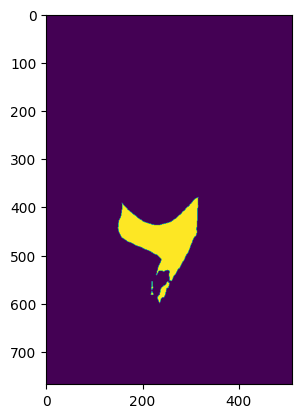

11


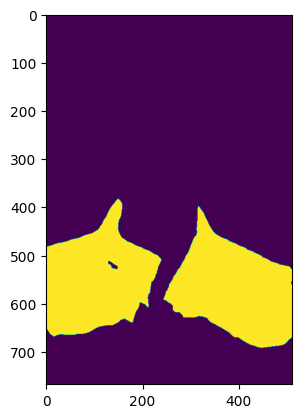

In [9]:
plt.imshow(preprocessed_mask_np, cmap='viridis')
plt.show()
for i in np.unique(preprocessed_mask_np):
    image_array_test = preprocessed_mask_np.copy()
    image_array_test_mono = np.where(image_array_test == i,1,0)
    print(i)
    plt.imshow(image_array_test_mono, cmap='viridis')
    plt.show()

In [10]:
atts = ['skin', 'l_brow', 'r_brow', 'l_eye', 'r_eye', 'eye_g', 'l_ear', 'r_ear', 'ear_r',
            'nose', 'mouth', 'u_lip', 'l_lip', 'neck', 'neck_l', 'cloth', 'hair', 'hat']

labels_dict = {x: idx for idx, x in enumerate(atts)}

In [11]:
labels_dict

{'skin': 0,
 'l_brow': 1,
 'r_brow': 2,
 'l_eye': 3,
 'r_eye': 4,
 'eye_g': 5,
 'l_ear': 6,
 'r_ear': 7,
 'ear_r': 8,
 'nose': 9,
 'mouth': 10,
 'u_lip': 11,
 'l_lip': 12,
 'neck': 13,
 'neck_l': 14,
 'cloth': 15,
 'hair': 16,
 'hat': 17}

In [20]:
part_colors = [[255, 125, 125], [215, 235, 255], [50, 65, 225],
                   [0, 140, 255], [0, 252, 124],
                   [167, 108, 188], [66, 71, 147], [170, 255, 0],
                   [19, 69, 139], [0, 255, 170],
                   [0, 0, 255], [85, 219, 236], [170, 0, 255],
                   [0, 85, 255], [0, 170, 255],
                   [255, 255, 0], [255, 255, 85], [255, 255, 170],
                   [255, 0, 255], [255, 85, 255], [255, 170, 255],
                   [0, 255, 255], [85, 255, 255], [170, 255, 255]]

label_dict = {
    "background": 0,
    "skin": 1, 
    "nose": 2,
    "eyebrow": 3,
    "eye": 4, 
    "lip": 5, 
    "mouth": 6,
    "ear": 7, 
    "hair": 8,
    "accessories": 9, 
    "neck": 10, 
    "clothing": 11,
    "beard": 12,
    "misc": 13,
    "ignore":14
}


In [21]:
label_dict_color = {k:(v, part_colors[v]) for k,v in label_dict.items()}
label_dict_color

{'background': (0, [255, 125, 125]),
 'skin': (1, [215, 235, 255]),
 'nose': (2, [50, 65, 225]),
 'eyebrow': (3, [0, 140, 255]),
 'eye': (4, [0, 252, 124]),
 'lip': (5, [167, 108, 188]),
 'mouth': (6, [66, 71, 147]),
 'ear': (7, [170, 255, 0]),
 'hair': (8, [19, 69, 139]),
 'accessories': (9, [0, 255, 170]),
 'neck': (10, [0, 0, 255]),
 'clothing': (11, [85, 219, 236]),
 'beard': (12, [170, 0, 255]),
 'misc': (13, [0, 85, 255]),
 'ignore': (14, [0, 170, 255])}

In [ ]:
label_dict_color = {'background': (0, [255, 125, 125]),
 'skin': (1, [215, 235, 255]),
 'nose': (2, [50, 65, 225]),
 'eyebrow': (3, [0, 140, 255]),
 'eye': (4, [0, 252, 124]),
 'lip': (5, [167, 108, 188]),
 'mouth': (6, [66, 71, 147]),
 'ear': (7, [170, 255, 0]),
 'hair': (8, [19, 69, 139]),
 'accessories': (9, [0, 255, 170]),
 'neck': (10, [0, 0, 255]),
 'clothing': (11, [85, 219, 236]),
 'beard': (12, [170, 0, 255]),
 'misc': (13, [0, 85, 255]),
 'ignore': (14, [0, 170, 255])}

background : 0


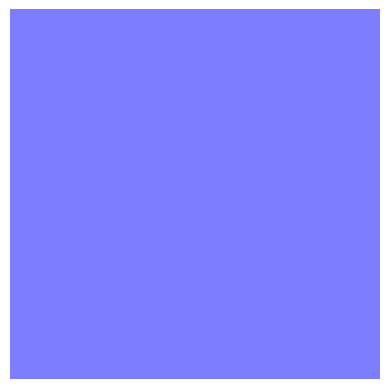

skin : 1


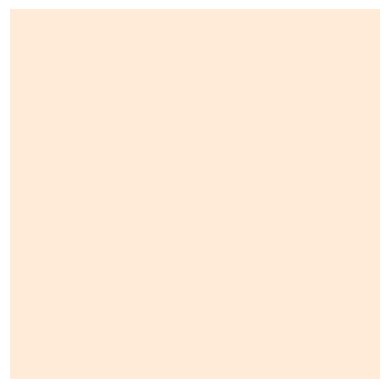

nose : 2


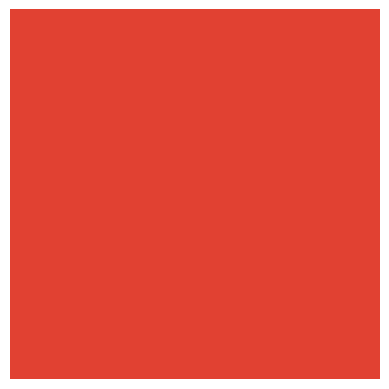

eyebrow : 3


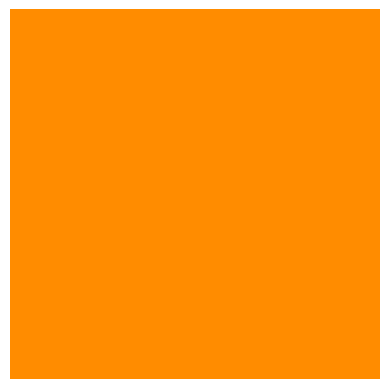

eye : 4


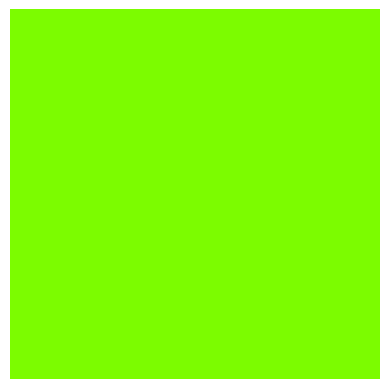

lip : 5


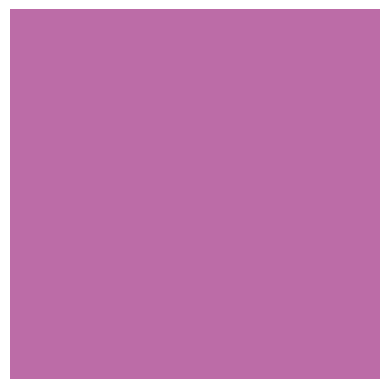

mouth : 6


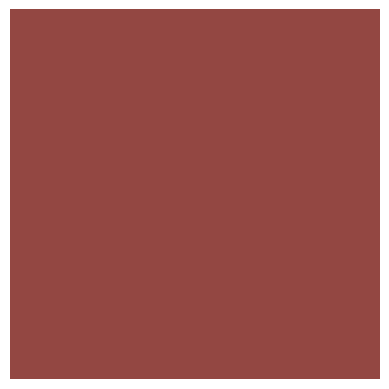

ear : 7


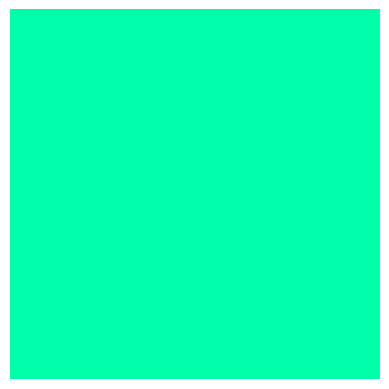

hair : 8


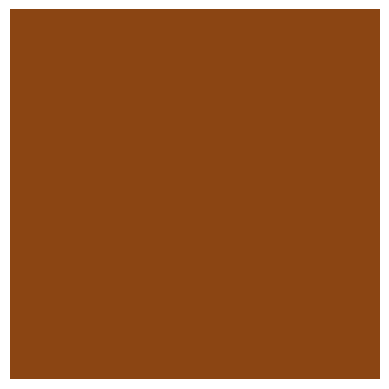

accessories : 9


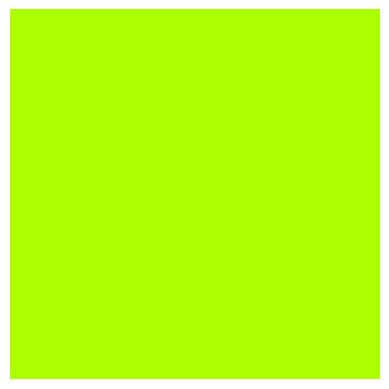

neck : 10


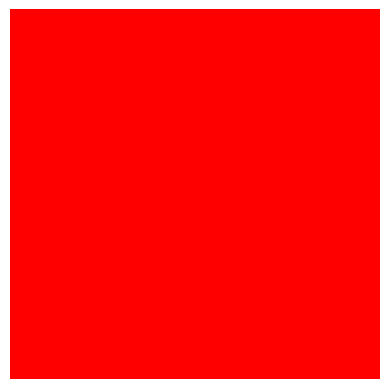

clothing : 11


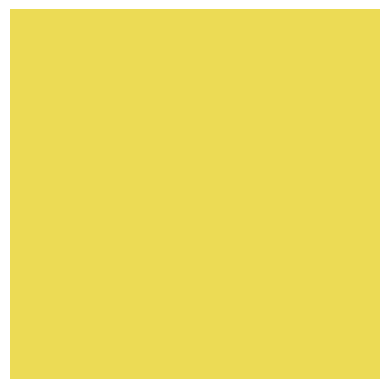

beard : 12


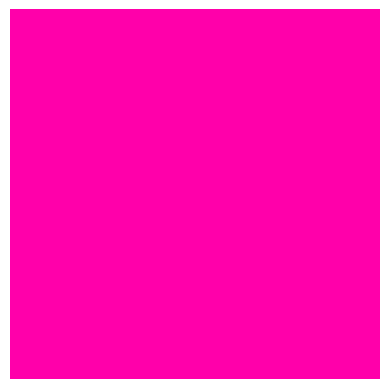

misc : 13


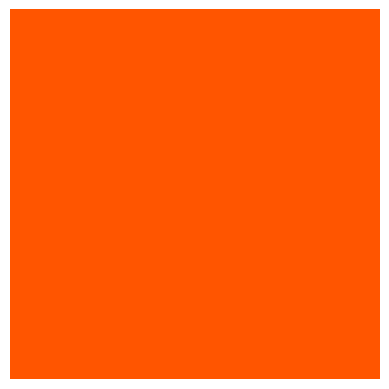

ignore : 14


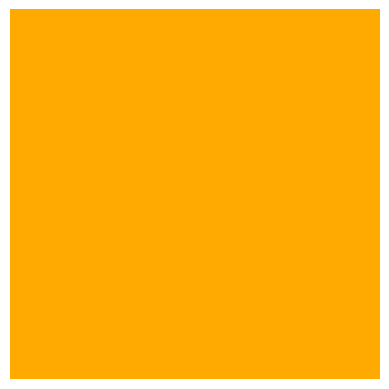

In [22]:
for k,v in label_dict_color.items():
    rgb = v[1]
    bgr = rgb[::-1]
    img = np.full((15,15,3), bgr, dtype=np.uint8)
    print(f'{k} : {v[0]}')

    # Plot image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [23]:
a = ['r','g','b']
rev = a[::-1]
a, rev

(['r', 'g', 'b'], ['b', 'g', 'r'])